# Handwritten Digit Recognition using CNN

Importing necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Importing the data and splitting it into trainig and testing data sets

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(28, 28)


Visualizing the Data

<Figure size 640x480 with 0 Axes>

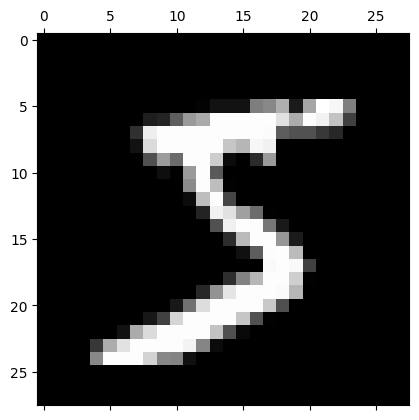

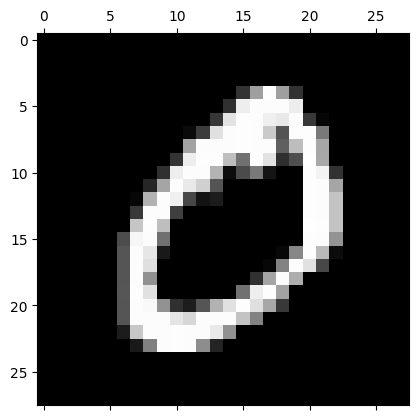

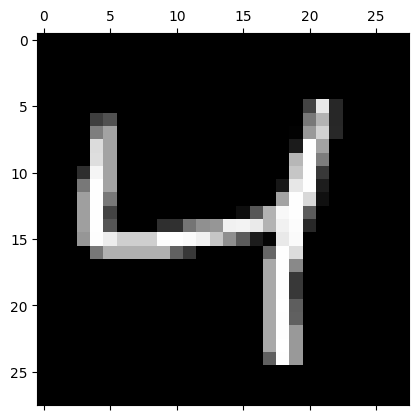

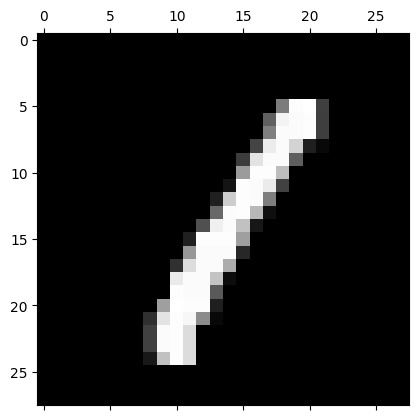

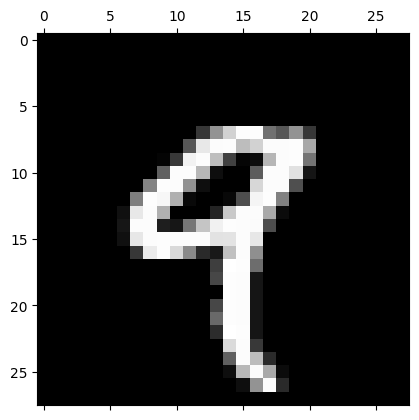

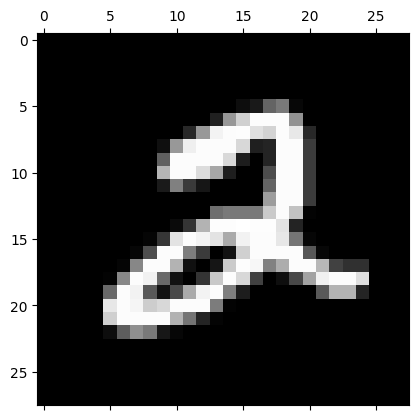

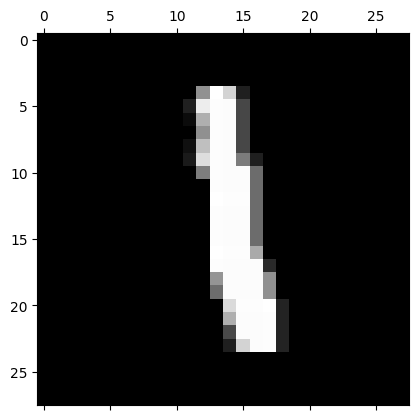

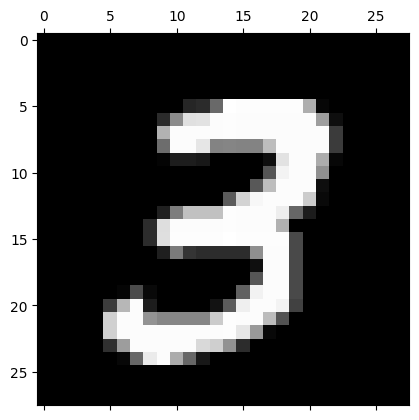

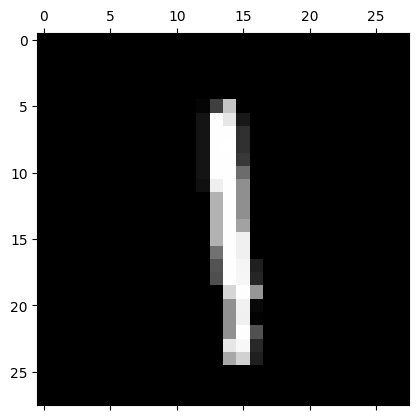

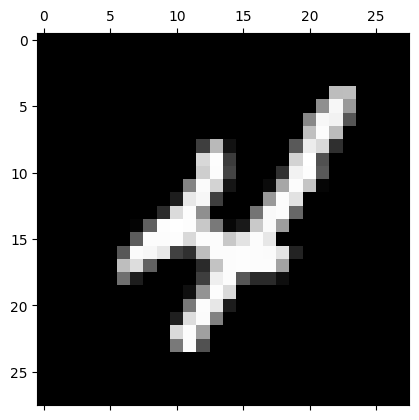

In [3]:
plt.gray()
for i in range(10):
    plt.matshow(X_train[i])

Normalizing the training data set

In [5]:
len(X_train.data)  # total number of inputs

print(X_train[0]/255)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the model


In [6]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(20, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


C:\Users\ARSHIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8620 - loss: 1.4327
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9777 - loss: 0.0734
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9826 - loss: 0.0567
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9853 - loss: 0.0472
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9889 - loss: 0.0358


Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


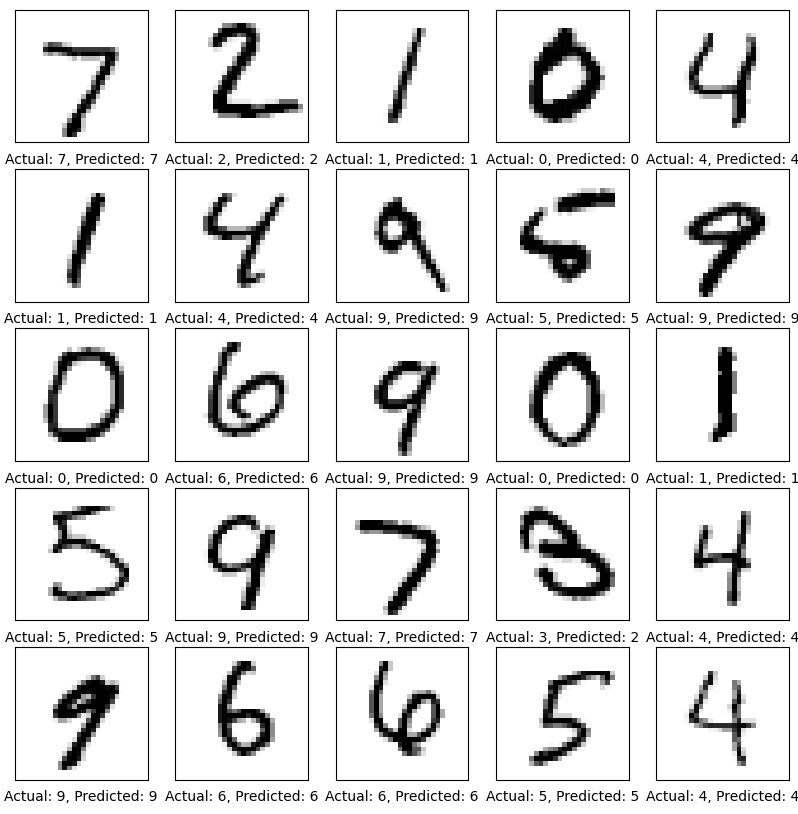

In [7]:
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_value = y_test[i]
    predicted_value = predictions[i].argmax()
    plt.xlabel(f'Actual: {actual_value}, Predicted: {predicted_value}')

plt.show()

Confusin matrix for visualizing the accuracy of model

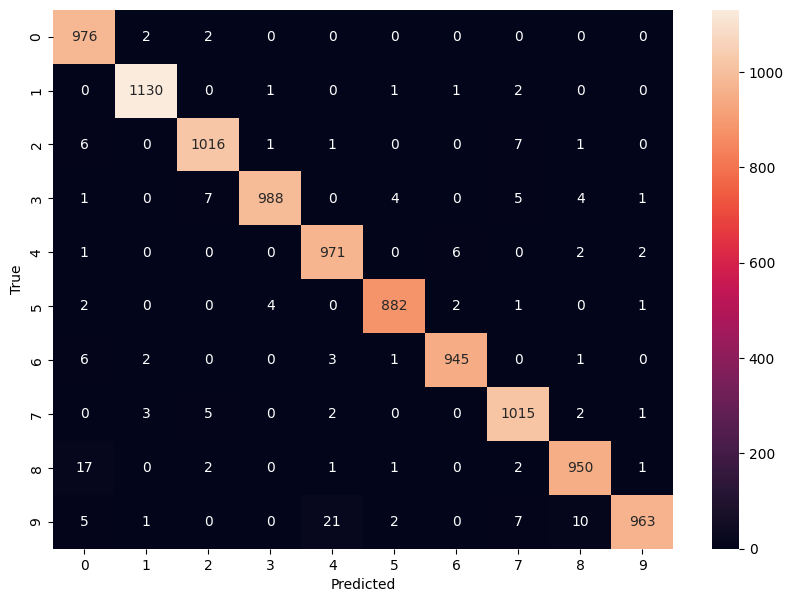

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming predictions is an array of class labels predicted by your model
y_pred = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import seaborn as sn


plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [9]:
from sklearn.metrics import accuracy_score

# Assuming y_pred is the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.36%
